## Question 1

In [9]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

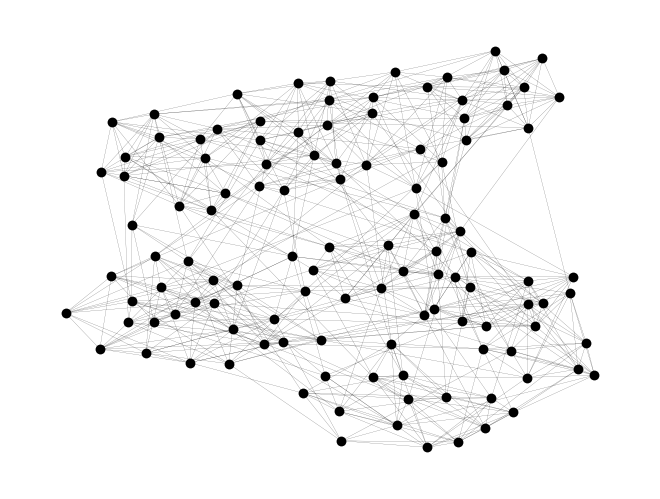

In [10]:
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

In [11]:
def summary(centrality):
    df = pd.DataFrame.from_dict({
    'node': list(centrality.keys()),
    'centrality': list(centrality.values())})
    df = df.sort_values('centrality', ascending=False)
    return df

In [12]:
degree_cent = nx.degree_centrality(G)
degree_cent = summary(degree_cent)
print(degree_cent)
# degree_cent.to_csv("degree.csv")

                   node  centrality
0          BrighamYoung    0.105263
7    SouthernCalifornia    0.105263
67               Nevada    0.105263
15            Wisconsin    0.105263
104      NevadaLasVegas    0.105263
..                  ...         ...
28           BoiseState    0.078947
59      LouisianaMonroe    0.070175
36       CentralFlorida    0.070175
97   LouisianaLafayette    0.070175
42          Connecticut    0.061404

[115 rows x 2 columns]


In [13]:
betweenness_cent = nx.betweenness_centrality(G)
betweenness_cent = summary(betweenness_cent)
print(betweenness_cent)
# betweenness_cent.to_csv("between.csv")

                node  centrality
82         NotreDame    0.033533
0       BrighamYoung    0.032490
80              Navy    0.029161
58     LouisianaTech    0.028823
38   CentralMichigan    0.025187
..               ...         ...
94           Rutgers    0.005317
8       ArizonaState    0.005009
105       WakeForest    0.004372
54              Kent    0.003906
108      OregonState    0.003002

[115 rows x 2 columns]


In [14]:
closeness_cent = nx.closeness_centrality(G)
closeness_cent = summary(closeness_cent)
print(closeness_cent)
# closeness_cent.to_csv("closeness.csv")

                node  centrality
58     LouisianaTech    0.436782
80              Navy    0.435115
88             Tulsa    0.430189
106          Indiana    0.426966
6          PennState    0.425373
..               ...         ...
42       Connecticut    0.370130
22           Arizona    0.367742
78   WashingtonState    0.366559
8       ArizonaState    0.360759
108      OregonState    0.354037

[115 rows x 2 columns]


In [15]:
eigenvector_cent = nx.eigenvector_centrality(G)
eigenvector_cent = summary(eigenvector_cent)
print(eigenvector_cent)
# eigenvector_cent.to_csv("eigenvector.csv")

                    node  centrality
67                Nevada    0.127683
53     SouthernMethodist    0.122577
88                 Tulsa    0.121289
7     SouthernCalifornia    0.120724
73          SanJoseState    0.119902
..                   ...         ...
63  MiddleTennesseeState    0.062019
97    LouisianaLafayette    0.058903
36        CentralFlorida    0.056144
59       LouisianaMonroe    0.054572
42           Connecticut    0.048312

[115 rows x 2 columns]


In [16]:
def high_low(graph):
    high = nx.eigenvector_centrality(graph)
    low = nx.betweenness_centrality(graph)

    sorted_nodes_high = sorted(high, key=high.get, reverse=True)
    top_nodes = sorted_nodes_high[:10]

    sorted_nodes_low = sorted(low, key=low.get)
    bottom_nodes = sorted_nodes_low[:10]

    result = list(set(top_nodes).intersection(bottom_nodes))

    return result

high_low(G)

['TexasElPaso']

## Question 3

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

Step1: rename the dataset to government edges.txt and load it.

In [18]:
# Load the realworld network
G = nx.read_edgelist('government_edges.txt', delimiter=',')

In [19]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 7057
Number of edges: 89455


Step2: show the degree distribution using a log-log plot.

In [ ]:
# Calculate the degree distribution
degree_sequence = [d for n, d in G.degree()]
degree_count = dict()
for d in degree_sequence:
    if d in degree_count:
        degree_count[d] += 1
    else:
        degree_count[d] = 1

# Normalize the degree distribution to get the degree probability
degree_density = {k: v / G.number_of_nodes() for k, v in degree_count.items()}


degrees = np.array(list(degree_density.keys()))
density = np.array(list(degree_density.values()))

indicies = np.argsort(degrees)

degrees = degrees[indicies]
density = density[indicies]


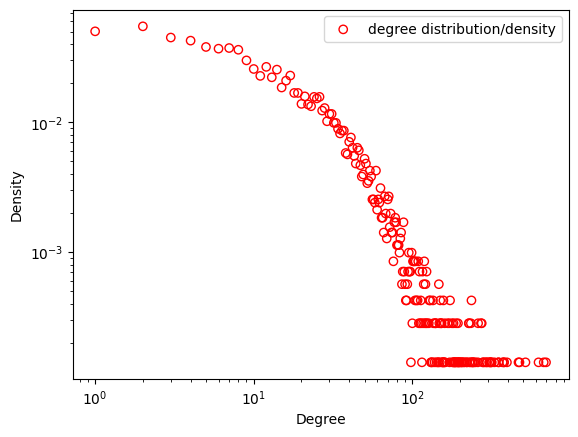

In [ ]:
plt.scatter(degrees, density, facecolors='none', edgecolors='r', label='degree distribution/density')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('Density')
plt.legend()

Step3: use linear regression on the degree distribution. show the regression fit, and estimate α of the power-law distribution.

In [ ]:
from scipy.stats import linregress
import numpy as np

"""
Implement: compute the log of degrees and density
you are given "degrees" and "density"
try to compute "log_deg" and "log_density"
"""

log_deg = np.log(degrees)
log_density = np.log(density)

"""
End of implement 
"""


"""
we want to solve
slope, intercept = argmin [ (slope * log(degree) + intercept) - log(density) ]**2 

Implement: solve for slope and intercept in the above equation  
you are given "log_deg" and "log_density"
observing the linearity starts from degree=20, you only use "log_deg" and "log_density" after degree=20,
try to get "slope_density" and "intercept_density" using linregerss from scipy.stats
"""

mask = log_deg >= np.log(20)
slope_density, intercept_density, _, _, _ = linregress(log_deg[mask], log_density[mask])

"""
End of implement 
"""


"""
Recall that the degree obeys power-law distribution:

degree_density = b*degree^(-alpha)
log(degree_density) = log(b) + (-alpha)*log(degree)

since we are doing fitting on the log space
the slope we obtained is (-alpha)
and the intercept is log(b) 

Implement:
compute "alpha_density" and "b_density" from slope_density and intercept_density

"""

alpha_density = -slope_density
b_density = np.exp(intercept_density)

"""
End of implement 
"""

'\nEnd of implement \n'

In [ ]:
def power_law(degree, alpha, b):
    """
    Implement:
        powerlaw function: b*degree^(-alpha)
        
        'alpha', 'b' are the parameters of the function to be estimated
        'b' is not of our concern, but we need it to do the plot;
        'alpha' is the parameter we are interested in
    """

    return b * np.power(degree, -alpha)

    """
    End of implement 
    """

'\nEnd of implement \n'

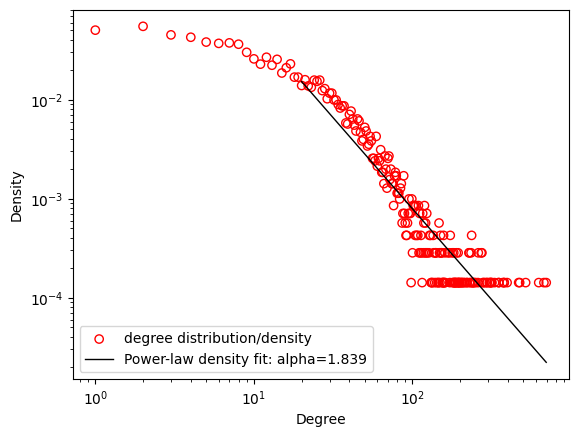

In [ ]:
# Plot the PDF and the fitted power-law distribution
plt.scatter(degrees, density, facecolors='none', edgecolors='r', label='degree distribution/density')
plt.yscale('log')
plt.xscale('log')

"""
Implement:
(1) use the estimated alpha_density, b_density to predict the density of the degree
"""

predicted_density = power_law(degrees, alpha_density, b_density)

"""
End of implement 
"""


"""
Implement:
(2) do the plot, starting from degree=20, specifying the value of alpha_density
"""

mask = degrees >= 20

plt.loglog(degrees[mask], predicted_density[mask], color='black', linestyle='-', linewidth=1, 
         label=f'Power-law density fit: alpha={alpha_density:.3f}')
plt.xlabel('Degree')
plt.ylabel('Density')
plt.legend()

"""
End of implement 
"""

Step4: show the complementary cumulative denstiy function (CCDF) using a log-log plot

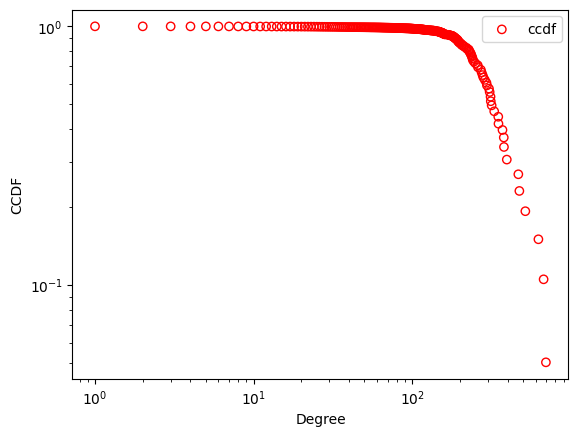

In [ ]:
"""
Implement:
    compute the CCDF 'ccdf_y' based on 'degrees' and 'density'
    (complementary cumulative distribution function) 
    of the node degrees.

Notice:
    please sort the CCDF so that the corresponding degrees are in ascending order.
"""

# Sort degrees and density in ascending order
sorted_idx = np.argsort(degrees)
sorted_degrees = degrees[sorted_idx]
sorted_density = density[sorted_idx]

# Compute CCDF
ccdf_y = np.flip(np.cumsum(sorted_density))

"""
End of implement 
"""

plt.scatter(sorted_degrees, ccdf_y, facecolors='none', edgecolors='r', label='ccdf')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.legend()

Step5: use linear regression on the ccdf. show the regression fit, and estimate α of the power-law distribution.

In [ ]:
"""
Implement: compute the log of degrees and ccdf
you are given "degrees" and "ccdf_y"
try to compute "log_deg" and "log_ccdf"
"""

log_deg = np.log(degrees)
log_ccdf = np.log(ccdf_y)

"""
End of implement 
"""


"""
we want to solve
slope, intercept = argmin [ (slope * log(degree) + intercept) - log(ccdf) ]**2 

Implement: solve for slope and intercept in the above equation  
you are given "log_deg" and "log_ccdf"
observing the linearity starts from degree=20, you only use "log_deg" and "log_ccdf" after degree=20,
try to get "slope_ccdf" and "intercept_ccdf" using linregerss from scipy.stats
"""

mask = log_deg >= np.log(20)
slope_ccdf, intercept_ccdf, _, _, _ = linregress(log_deg[mask], log_ccdf[mask])

"""
End of implement 
"""


"""
Recall that the degree obeys power-law distribution:

degree_density = b*degree^(-alpha)
log(degree_density) = log(b) + (-alpha)*log(degree)

since we are doing fitting on the log space
the slope we obtained is (-alpha)
and the intercept is log(b) 

Implement:
compute "alpha_ccdf" and "b_ccdf" from slope_ccdf and intercept_ccdf

"""

alpha_ccdf = -slope_ccdf
b_ccdf = np.exp(intercept_ccdf)

"""
End of implement 
"""

'\nEnd of implement \n'

'\nEnd of implement \n'

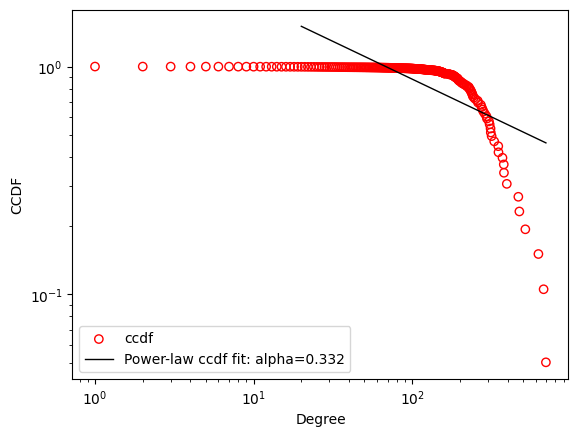

In [ ]:
# Plot the PDF and the fitted power-law distribution
plt.scatter(degrees, ccdf_y, facecolors='none', edgecolors='r', label='ccdf')
plt.yscale('log')
plt.xscale('log')

"""
Implement:
(1) use the estimated alpha_ccdf, b_ccdf to predict the ccdf of a degree
"""

predicted_ccdf = b_ccdf * np.power(degrees, -alpha_ccdf)

"""
End of implement 
"""


"""
Implement:
(2) do the plot, starting from degree=20, specifying the value of alpha_ccdf and alpha_lsr
"""

mask = degrees >= 20

plt.loglog(degrees[mask], predicted_ccdf[mask], color='black', linestyle='-', linewidth=1, 
         label=f'Power-law ccdf fit: alpha={alpha_ccdf:.3f}')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.legend()

"""
End of implement 
"""